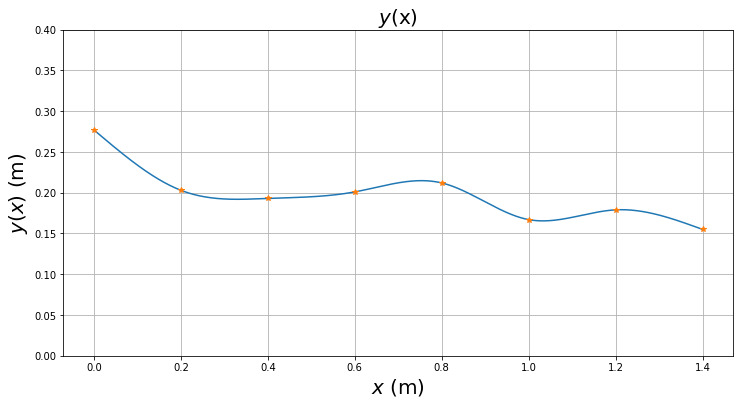

Antall forsøk 1678
Festepunkthøyder (m) [0.277 0.203 0.193 0.201 0.212 0.167 0.179 0.155]
Banens høyeste punkt (m) 0.277
NB: SKRIV NED festepunkthøydene når du/dere er fornøyd med banen.
Eller kjør programmet på nytt inntil en attraktiv baneform vises.


In [79]:
# TFY41xx Fysikk vaaren 2021.
#
# Programmet tar utgangspunkt i hoeyden til de 8 festepunktene.
# Deretter beregnes baneformen y(x) ved hjelp av 7 tredjegradspolynomer, 
# et for hvert intervall mellom to festepunkter, slik at baade banen y, 
# dens stigningstall y' = dy/dx og dens andrederiverte
# y'' = d2y/dx2 er kontinuerlige i de 6 indre festepunktene.
# I tillegg velges null krumning (andrederivert) 
# i banens to ytterste festepunkter (med bc_type='natural' nedenfor).
# Dette gir i alt 28 ligninger som fastlegger de 28 koeffisientene
# i de i alt 7 tredjegradspolynomene.

# De ulike banene er satt opp med tanke paa at kula skal 
# (1) fullfoere hele banen selv om den taper noe mekanisk energi underveis;
# (2) rulle rent, uten aa gli ("slure").

# Vi importerer noedvendige biblioteker:
import re, glob, os
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

# Horisontal avstand mellom festepunktene er 0.200 m
h = 0.200
xfast=np.asarray([0,h,2*h,3*h,4*h,5*h,6*h,7*h])


# Vi begrenser starthøyden (og samtidig den maksimale høyden) til
# å ligge mellom 250 og 300 mm
ymax = 300
# yfast: tabell med 8 heltall mellom 50 og 300 (mm); representerer
# høyden i de 8 festepunktene
yfast=np.asarray(np.random.randint(50, ymax, size=8))
yfast=np.array([27.7, 20.3, 19.3, 20.1, 21.2, 16.7, 17.9, 15.5])

#konverter fra m til mm
yfast =yfast/1000
# inttan: tabell med 7 verdier for (yfast[n+1]-yfast[n])/h (n=0..7); dvs
# banens stigningstall beregnet med utgangspunkt i de 8 festepunktene.
inttan = np.diff(yfast)/h
attempts=1
# while-løkken sjekker om en eller flere av de 3 betingelsene ovenfor
# ikke er tilfredsstilt; i så fall velges nye festepunkter inntil
# de 3 betingelsene er oppfylt
while (yfast[0] < yfast[1]*1.04 or
       yfast[0] < yfast[2]*1.08 or
       yfast[0] < yfast[3]*1.12 or
       yfast[0] < yfast[4]*1.16 or
       yfast[0] < yfast[5]*1.20 or
       yfast[0] < yfast[6]*1.24 or
       yfast[0] < yfast[7]*1.28 or
       yfast[0] < 0.250 or
       np.max(np.abs(inttan)) > 0.4 or
       inttan[0] > -0.2):
          yfast=np.asarray(np.random.randint(0, ymax, size=8))
          
          #konverter fra m til mm
          yfast =yfast/1000
          
          inttan = np.diff(yfast)/h
          attempts=attempts+1
        
yfast=np.array([0.277, 0.203, .193, .201, .212, .167, .179, .155])


# Omregning fra mm til m:
# xfast = xfast/1000
# yfast = yfast/1000

# Når programmet her har avsluttet while-løkka, betyr det at
# tallverdiene i tabellen yfast vil resultere i en tilfredsstillende bane. 

#Programmet beregner deretter de 7 tredjegradspolynomene, et
#for hvert intervall mellom to nabofestepunkter.


#Med scipy.interpolate-funksjonen CubicSpline:
cs = CubicSpline(xfast, yfast, bc_type='natural')

xmin = 0.000
xmax = 1.401
dx = 0.001

x = np.arange(xmin, xmax, dx)   

#funksjonen arange returnerer verdier paa det "halvaapne" intervallet
#[xmin,xmax), dvs slik at xmin er med mens xmax ikke er med. Her blir
#dermed x[0]=xmin=0.000, x[1]=xmin+1*dx=0.001, ..., x[1400]=xmax-dx=1.400, 
#dvs x blir en tabell med 1401 elementer
Nx = len(x)
y = cs(x)       #y=tabell med 1401 verdier for y(x)
dy = cs(x,1)    #dy=tabell med 1401 verdier for y'(x)
d2y = cs(x,2)   #d2y=tabell med 1401 verdier for y''(x)

#Eksempel: Plotter banens form y(x)
baneform = plt.figure('y(x)',figsize=(12,6))
plt.plot(x,y,xfast,yfast,'*')
plt.title('$y$(x)',fontsize=20)
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$y(x)$ (m)',fontsize=20)
plt.ylim(0.0,0.40)
plt.grid()
plt.show()
#Figurer kan lagres i det formatet du foretrekker:
#baneform.savefig("baneform.pdf", bbox_inches='tight')
#baneform.savefig("baneform.png", bbox_inches='tight')
#baneform.savefig("baneform.eps", bbox_inches='tight')


print('Antall forsøk',attempts)
print('Festepunkthøyder (m)',yfast)
print('Banens høyeste punkt (m)',np.max(y))

print('NB: SKRIV NED festepunkthøydene når du/dere er fornøyd med banen.')
print('Eller kjør programmet på nytt inntil en attraktiv baneform vises.')

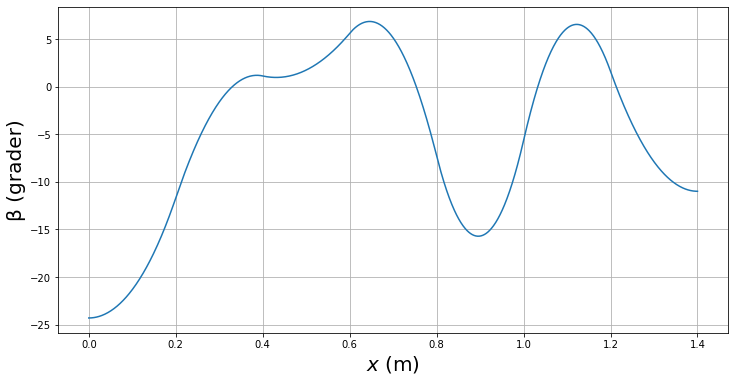

In [59]:
beta=np.arctan(dy)
betadeg=beta*180/np.pi

baneform = plt.figure('y(x)',figsize=(12,6))
plt.plot(x,betadeg)
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('\u03B2 (grader)',fontsize=20)
plt.grid()
plt.show()

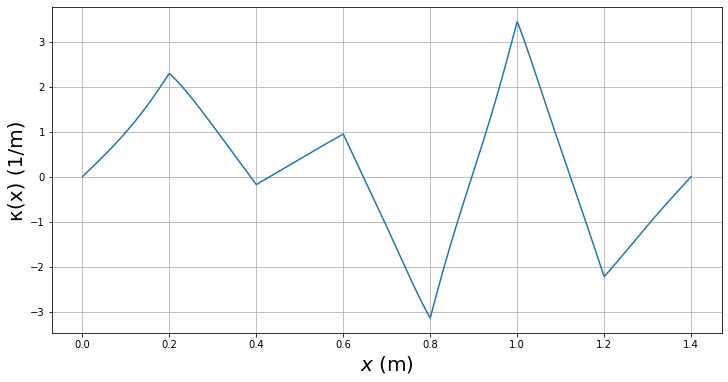

In [60]:
kappa=d2y/(1+dy**2)**(3/2)
baneform = plt.figure('y(x)',figsize=(12,6))
plt.plot(x,kappa)
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('\u03BA(x) (1/m)',fontsize=20)
plt.grid()
plt.show()

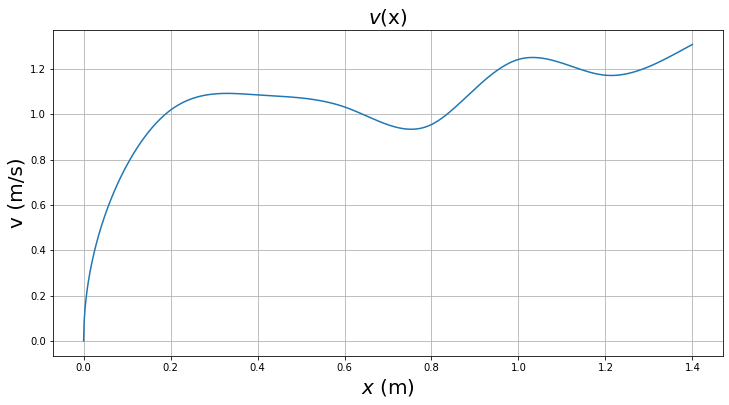

In [61]:
baneform = plt.figure('y(x)',figsize=(12,6))
v=np.sqrt((10*9.81*(yfast[0]-y)/(7)))
plt.plot(x,v)
plt.title('$v$(x)',fontsize=20)
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('v (m/s)',fontsize=20)
# plt.xlim(0.0,1.2)
plt.grid()
plt.show()

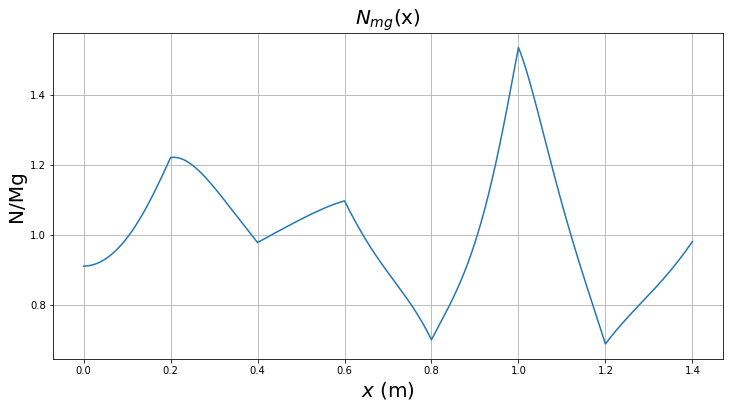

In [62]:
N_mg=np.cos(beta)+(v**2*kappa)/9.81
baneform = plt.figure('y(x)',figsize=(12,6))
plt.plot(x,N_mg)
plt.title('$N_{mg}$(x)',fontsize=20)
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('N/Mg',fontsize=20)
plt.grid()
plt.show()

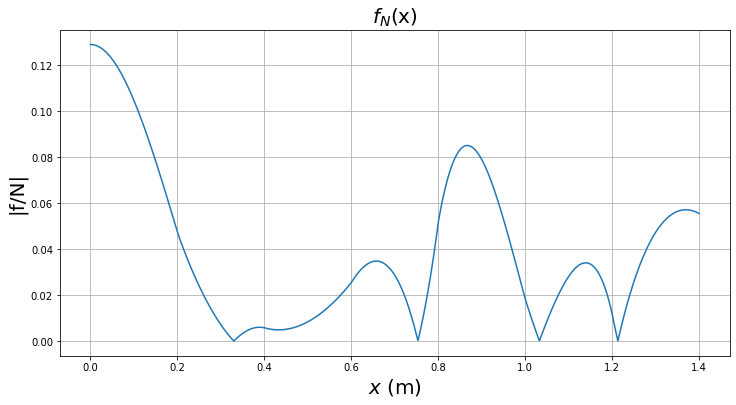

In [63]:
f_N=abs((((2/5)*np.sin(beta))/(1+(2/5)))/N_mg)
baneform = plt.figure('y(x)',figsize=(12,6))
plt.plot(x,f_N)
plt.title('$f_N$(x)',fontsize=20)
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('|f/N|',fontsize=20)
plt.grid()
plt.show()

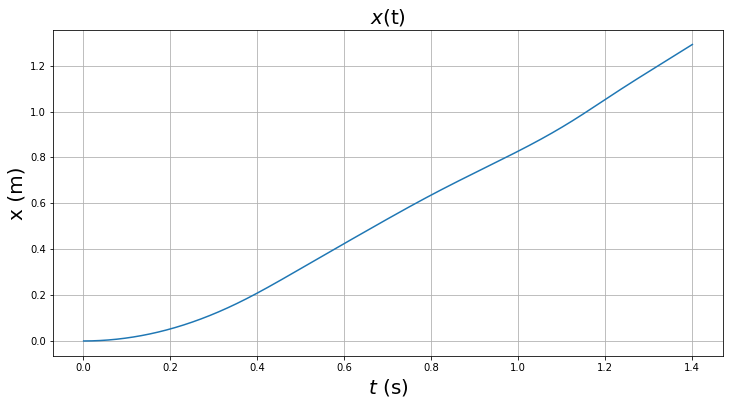

In [64]:
x0=0
v0=0
t0=0

h=0.001
N=1400

t=np.zeros(N+1)
x=np.zeros(N+1)
v=np.zeros(N+1)

t_old=t0
x_old=x0
v_old=v0

dy=cs.derivative()
def beta(x):
    return -np.arctan(dy(x))


for n in range(N+1):
    x[n]=x_old+v_old*np.cos(beta(x_old))*h
    v[n]=v_old+((5*9.81)/7*np.sin(beta(x_old)))*h
    x_old=x[n]
    v_old=v[n]
    t[n]=t[n-1]+h
   
baneform = plt.figure('y(x)',figsize=(12,6))
plt.plot(t,x)
plt.title('$x$(t)',fontsize=20)
plt.xlabel('$t$ (s)',fontsize=20)
plt.ylabel('x (m)' ,fontsize=20)
plt.grid()
plt.show()   
    


1.2062234340294349


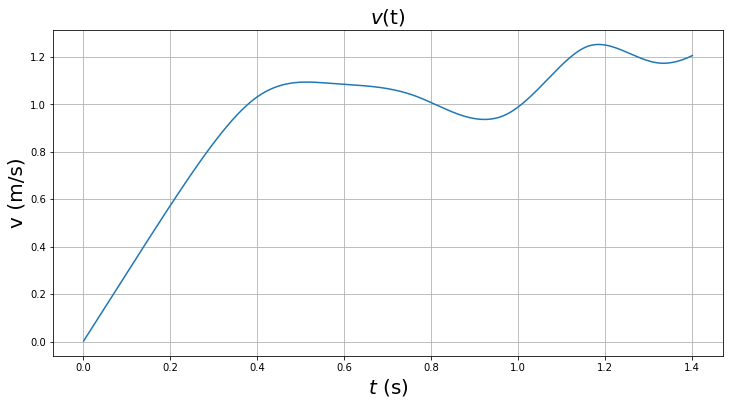

In [65]:
print(v[-1])
baneform = plt.figure('v(t)',figsize=(12,6))
plt.plot(t,v)
plt.title('$v$(t)',fontsize=20)
plt.xlabel('$t$ (s)',fontsize=20)
plt.ylabel('v (m/s)' ,fontsize=20)
plt.grid()
plt.show()

In [94]:
if "Session3" not in os.getcwd():
    os.chdir("Session3")
data = [[], [], [], [], [], [], [], [], [], []]

for file in glob.glob("*.txt"):
    with open(file) as f:
        f_num = re.findall(r"\d+", file)
        f_num = int(f_num[0]) - 1
        # print(f_num)
        filedata = []
        while True:
            line = f.readline()
            if not line:
                break
            filedata.append(line)
        for line in filedata:
            d = {"t": 0, "x": 0, "y": 0, "v": 0}
            if re.match(r"([ -]?[01]{1}[.]\d*[E]*[-+]*\d*[\s]){4}", line):
                datapoints = line.split()
                d["t"], d["x"], d["y"], d["v"] = datapoints[-4:]
                data[f_num].append(d)

end_speeds = [float(d[-3]["v"]) for d in data]

avg_end_speed = np.average(end_speeds)

s_deviation = np.sqrt(
    (1)
    / (len(data) - 1)
    * np.sum([(end_speed - avg_end_speed) ** 2 for end_speed in end_speeds])
)

s_error = s_deviation / np.sqrt(len(end_speeds))

print("Average end speed:", avg_end_speed)
print("Standard deviation in end speed:", s_deviation)
print("Standard error:", s_error)



Average end speed: 1.0801886931423146
Standard deviation in end speed: 0.026779277773498953
Standard error: 0.008468351185857936


x 45 y 45


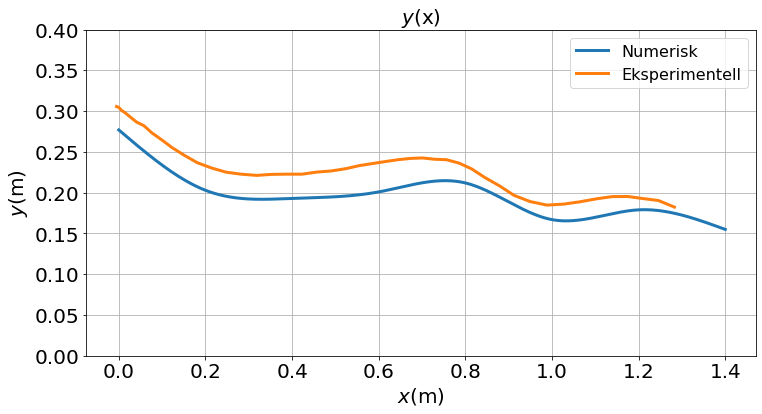

In [82]:

# Plotting
x_m = [float(data[0][i]["x"]) for i in range(len(data[0]))]
y_m = [float(data[0][i]["y"]) for i in range(len(data[0]))]
print("x", len(x_m), "y", len(y_m))
h = 0.200
baneform = plt.figure('y(x)',figsize=(12,6))
plt.plot(x,y, label="Numerisk", linewidth=3)
plt.plot(x_m, y_m, label="Eksperimentell", linewidth=3)
plt.title('$y$(x)',fontsize=20)
plt.xlabel('$x$(m)',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('$y$(m)',fontsize=20)
plt.ylim(0.0,0.4)
plt.legend(fontsize=16)
plt.grid()
plt.show()


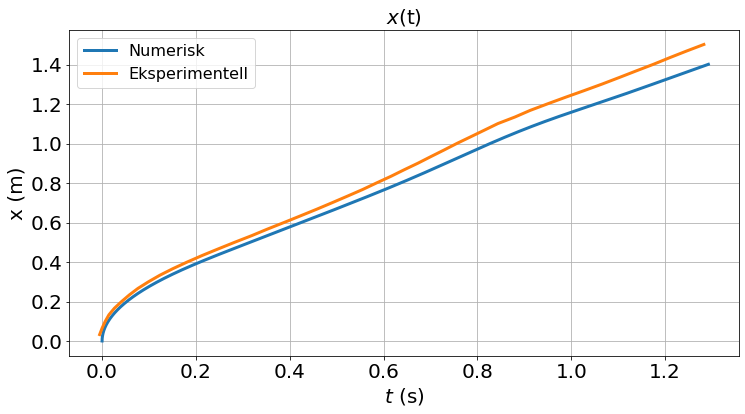

In [77]:
x0=0
v0=0
t0=0

h=0.001
N=1400

t=np.zeros(N+1)
x=np.zeros(N+1)
v=np.zeros(N+1)

t_old=t0
x_old=x0
v_old=v0

dy=cs.derivative()
def beta(x):
    return -np.arctan(dy(x))


for n in range(N+1):
    x[n]=x_old+v_old*np.cos(beta(x_old))*h
    v[n]=v_old+((5*9.81)/7*np.sin(beta(x_old)))*h
    x_old=x[n]
    v_old=v[n]
    t[n]=t[n-1]+h

    
t_m = [float(data[0][i]["t"]) for i in range(len(data[0]))]
baneform = plt.figure("x(t)", figsize=(12, 6))
plt.plot(x,t, label="Numerisk", linewidth=3)
plt.plot(x_m, t_m, label="Eksperimentell", linewidth=3)
plt.title('$x$(t)',fontsize=20)
plt.xlabel('$t$ (s)',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('x (m)' ,fontsize=20)
plt.legend(fontsize=16)
plt.grid()
plt.show()   
    